Submitted By: Salina Gurung

3.1 Warming up Exercises

Problem 1:  Data Read, Write and Inspect:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
print("\n" + "=" * 80)
print("PROBLEM 1: Data Read, Write and Inspect")
print("=" * 80)


print("\n--- Task 1: Loading bank.csv ---")
bank_df = pd.read_csv('/content/drive/MyDrive/bank.csv')
print("Dataset loaded successfully!")
print(f"Shape: {bank_df.shape}")

print("\n--- Task 2: DataFrame Info ---")
bank_df.info()

print("\n(a) Columns with dtype=object:")
object_columns = bank_df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

print("\n(b) Unique values of those columns:")
for col in object_columns:
    print(f"\n{col}: {bank_df[col].nunique()} unique values")
    print(f"Values: {bank_df[col].unique()}")

print("\n(c) Total number of null values in each column:")
null_counts = bank_df.isnull().sum()
print(null_counts)
print(f"\nTotal null values in dataset: {null_counts.sum()}")

print("\n--- Task 3: Creating numeric-only DataFrame ---")
bank_numeric_df = bank_df.select_dtypes(exclude=['object'])
print(f"New DataFrame shape: {bank_numeric_df.shape}")
print(f"Columns: {bank_numeric_df.columns.tolist()}")


bank_numeric_df.to_csv('banknumericdata.csv', index=False)
print("File 'banknumericdata.csv' created successfully!")


print("\n--- Task 4: Summary Statistics ---")
bank_numeric_read = pd.read_csv('banknumericdata.csv')
print("\nDataFrame Info:")
bank_numeric_read.info()

print("\nSummary Statistics:")
print(bank_numeric_read.describe())



PROBLEM 1: Data Read, Write and Inspect

--- Task 1: Loading bank.csv ---
Dataset loaded successfully!
Shape: (45211, 17)

--- Task 2: DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  ob

Problem 2: Data Imputations:

In [8]:
print("\n\n" + "=" * 80)
print("PROBLEM 2: Data Imputations")
print("=" * 80)


print("\n--- Task 1: Loading medical_student.csv ---")
medical_df = pd.read_csv('/content/drive/MyDrive/medical_students_dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {medical_df.shape}")

print("\n--- Task 2: Identifying Missing Values ---")
medical_df.info()

print("\nMissing values per column:")
missing_values = medical_df.isnull().sum()
print(missing_values[missing_values > 0])


print("\n--- Task 3: Filling Missing Values ---")

medical_cleaned = medical_df.copy()

for col in medical_df.columns:
    if medical_df[col].isnull().sum() > 0:
        print(f"\nColumn: {col}")
        print(f"Missing values: {medical_df[col].isnull().sum()}")
        print(f"Data type: {medical_df[col].dtype}")

        if medical_df[col].dtype in ['int64', 'float64']:

            medical_cleaned[col].fillna(medical_df[col].median(), inplace=True)
            print(f"Strategy: Filled with MEDIAN ({medical_df[col].median():.2f})")
            print("Reason: Median is robust to outliers for numeric data")
        else:
            medical_cleaned[col].fillna(medical_df[col].mode()[0], inplace=True)
            print(f"Strategy: Filled with MODE ({medical_df[col].mode()[0]})")
            print("Reason: Mode preserves the most common category")

print("\n\nMissing values after imputation:")
print(medical_cleaned.isnull().sum().sum(), "missing values remaining")

print("\n--- Task 4: Handling Duplicates ---")
print(f"Number of duplicate rows: {medical_cleaned.duplicated().sum()}")

if medical_cleaned.duplicated().sum() > 0:
    print("Removing duplicates...")
    medical_cleaned = medical_cleaned.drop_duplicates()
    print(f"New shape after removing duplicates: {medical_cleaned.shape}")
else:
    print("No duplicates found!")

print(f"\nFinal cleaned dataset shape: {medical_cleaned.shape}")




PROBLEM 2: Data Imputations

--- Task 1: Loading medical_student.csv ---
Dataset loaded successfully!
Shape: (68044, 13)

--- Task 2: Identifying Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68044 entries, 0 to 68043
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      61290 non-null  float64
 1   Age             61273 non-null  float64
 2   Gender          61268 non-null  object 
 3   Height          61254 non-null  float64
 4   Weight          61231 non-null  float64
 5   Blood Type      61244 non-null  object 
 6   BMI             61248 non-null  float64
 7   Temperature     61211 non-null  float64
 8   Heart Rate      61369 non-null  float64
 9   Blood Pressure  61324 non-null  float64
 10  Cholesterol     61218 non-null  float64
 11  Diabetes        61142 non-null  object 
 12  Smoking         61114 non-null  object 
dtypes: float64(9), object(4)
memory usage: 6.7+ 

/tmp/ipython-input-2732159901.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_cleaned[col].fillna(medical_df[col].median(), inplace=True)
/tmp/ipython-input-2732159901.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

No duplicates found!

Final cleaned dataset shape: (68044, 13)


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Problem 1,2 and 3

In [7]:

print("\nLoading titanic.csv...")
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')
print(f"Dataset loaded! Shape: {titanic_df.shape}")
print("\nFirst few rows:")
print(titanic_df.head())

print("\n" + "=" * 80)
print("PROBLEM 1: Subsetting First-Class Passengers")
print("=" * 80)

titanic_subset = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
print(f"\nSubsetted DataFrame shape: {titanic_subset.shape}")

titanic_first_class = titanic_subset[titanic_subset['Pclass'] == 1].copy()
print(f"First-class passengers: {titanic_first_class.shape[0]}")

print("\n--- Fare Statistics for First-Class Passengers ---")
print(f"Mean: ${titanic_first_class['Fare'].mean():.2f}")
print(f"Median: ${titanic_first_class['Fare'].median():.2f}")
print(f"Maximum: ${titanic_first_class['Fare'].max():.2f}")
print(f"Minimum: ${titanic_first_class['Fare'].min():.2f}")

print("\n" + "=" * 80)
print("PROBLEM 2: Handling Missing Age Values")
print("=" * 80)

print(f"\nNull values in 'Age' column: {titanic_first_class['Age'].isnull().sum()}")
print(f"Percentage of missing Age data: {(titanic_first_class['Age'].isnull().sum() / len(titanic_first_class)) * 100:.2f}%")

print("\nDropping rows with missing Age values...")
titanic_first_class = titanic_first_class.dropna(subset=['Age'])
print(f"New shape after dropping nulls: {titanic_first_class.shape}")
print(f"Remaining null values in Age: {titanic_first_class['Age'].isnull().sum()}")

print("\n" + "=" * 80)
print("PROBLEM 3: One-Hot Encoding for Embarked Column")
print("=" * 80)

titanic_encoded = titanic_df.copy()

print("\nOriginal 'Embarked' column unique values:")
print(titanic_encoded['Embarked'].value_counts())

embarked_encoded = pd.get_dummies(titanic_encoded['Embarked'], prefix='Embarked')
print("\nOne-hot encoded columns created:")
print(embarked_encoded.columns.tolist())

titanic_encoded = pd.concat([titanic_encoded, embarked_encoded], axis=1)

titanic_encoded = titanic_encoded.drop(columns=['Embarked'])
print("\nOriginal 'Embarked' column dropped")

print("\nFirst few rows of modified DataFrame:")
print(titanic_encoded[['Name', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head(10))



Loading titanic.csv...
Dataset loaded! Shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Problem 4


PROBLEM 4: Survival Rates by Gender

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Female survival rate: 74.20%
Male survival rate: 18.89%


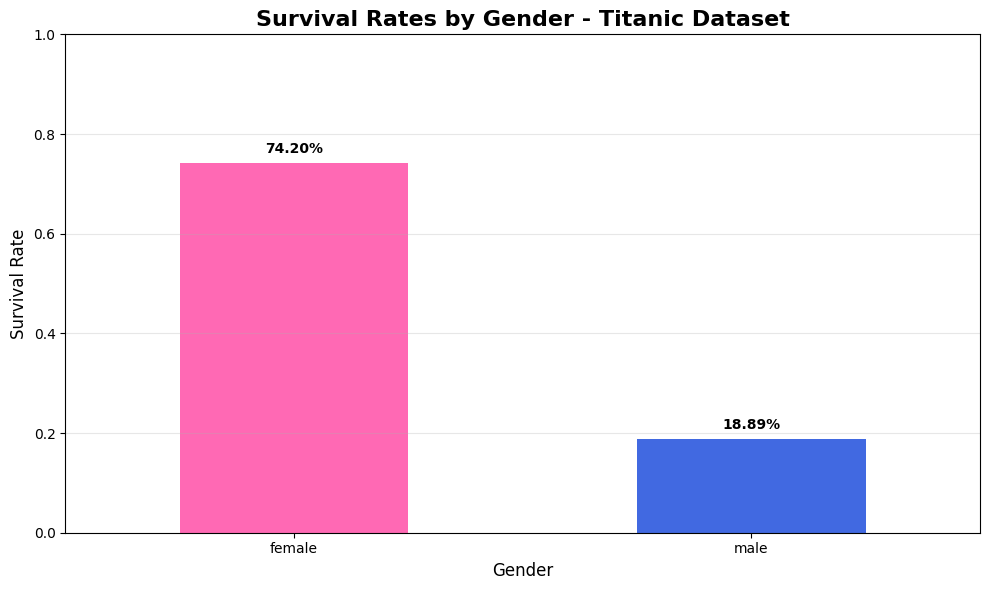

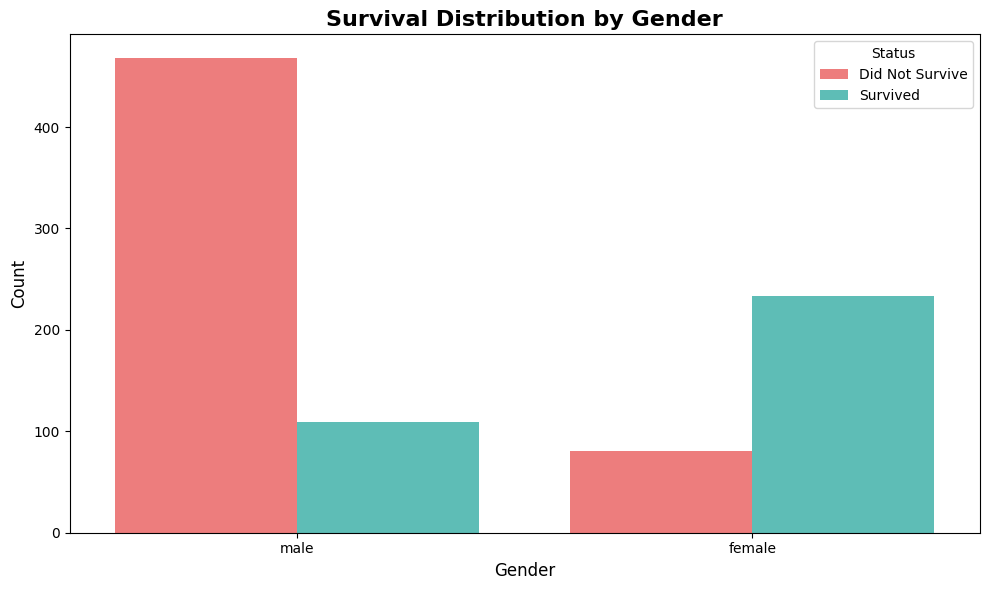

In [ ]:
print("\n" + "=" * 80)
print("PROBLEM 4: Survival Rates by Gender")
print("=" * 80)

survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("\nMean Survival Rates by Gender:")
print(survival_by_gender)
print(f"\nFemale survival rate: {survival_by_gender['female']:.2%}")
print(f"Male survival rate: {survival_by_gender['male']:.2%}")

plt.figure(figsize=(10, 6))
survival_by_gender.plot(kind='bar', color=['#FF69B4', '#4169E1'])
plt.title('Survival Rates by Gender - Titanic Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_by_gender):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
titanic_df_plot = titanic_df.copy()
titanic_df_plot['Survived_Label'] = titanic_df_plot['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})
sns.countplot(data=titanic_df_plot, x='Sex', hue='Survived_Label', palette=['#FF6B6B', '#4ECDC4'])
plt.title('Survival Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Problem 5


PROBLEM 5: Survival by Gender and Embarkation Port

Survival Rates by Embarkation Port and Gender:
Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


<Figure size 1200x600 with 0 Axes>

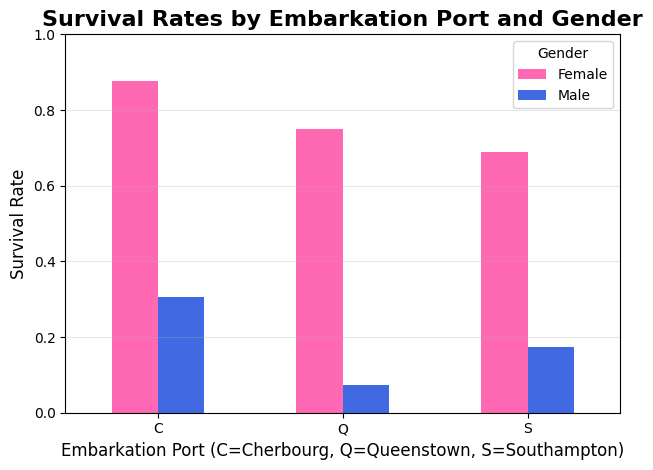

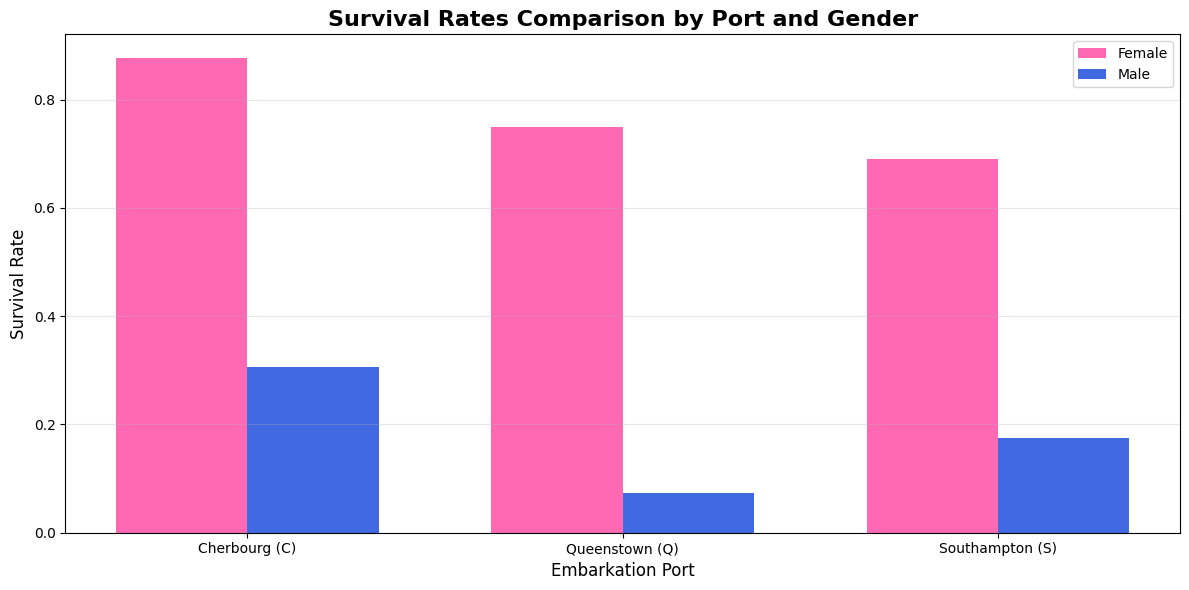

In [ ]:
print("\n" + "=" * 80)
print("PROBLEM 5: Survival by Gender and Embarkation Port")
print("=" * 80)

titanic_ports = titanic_df[titanic_df['Embarked'].isin(['C', 'Q', 'S'])].copy()

survival_gender_port = titanic_ports.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print("\nSurvival Rates by Embarkation Port and Gender:")
print(survival_gender_port)

plt.figure(figsize=(12, 6))
survival_gender_port.plot(kind='bar', color=['#FF69B4', '#4169E1'])
plt.title('Survival Rates by Embarkation Port and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(survival_gender_port.index))
width = 0.35
ax.bar(x - width/2, survival_gender_port['female'], width, label='Female', color='#FF69B4')
ax.bar(x + width/2, survival_gender_port['male'], width, label='Male', color='#4169E1')
ax.set_xlabel('Embarkation Port', fontsize=12)
ax.set_ylabel('Survival Rate', fontsize=12)
ax.set_title('Survival Rates Comparison by Port and Gender', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Problem 6


PROBLEM 6 (OPTIONAL): Survival by Age Group and Class

Age groups created:
Age_Group
Very Young    164
Young         137
Middle        127
Mature        144
Senior        142
Name: count, dtype: int64

Survival Rates by Passenger Class and Age Group:
Age_Group  Very Young     Young    Middle    Mature    Senior
Pclass                                                       
1            0.809524  0.761905  0.666667  0.777778  0.506667
2            0.742857  0.400000  0.416667  0.461538  0.363636
3            0.333333  0.197674  0.283582  0.166667  0.088235


/tmp/ipython-input-265712707.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_class = titanic_age.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()


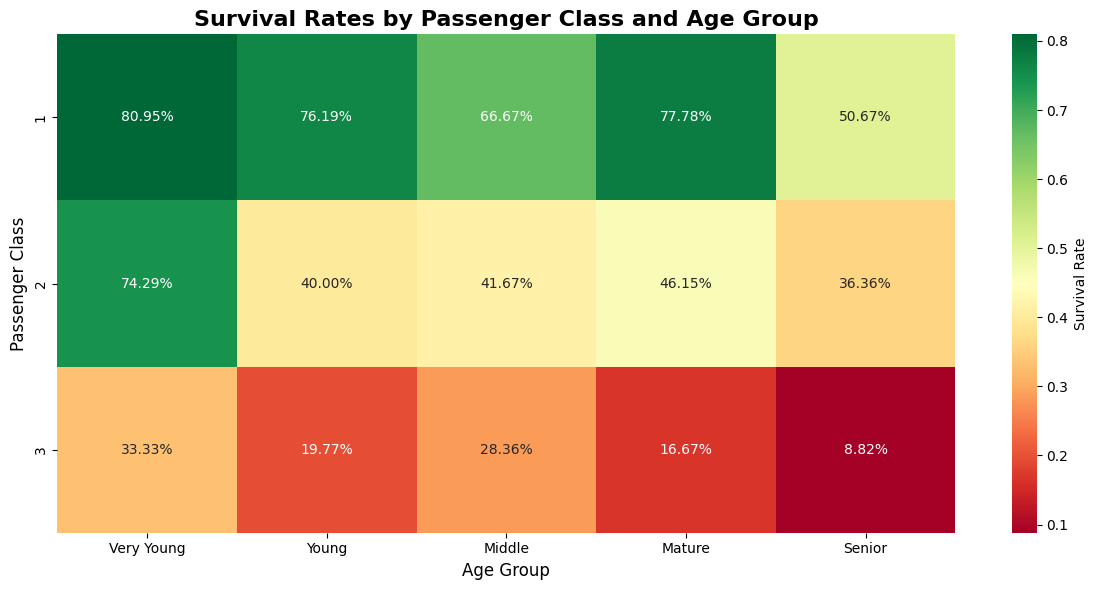

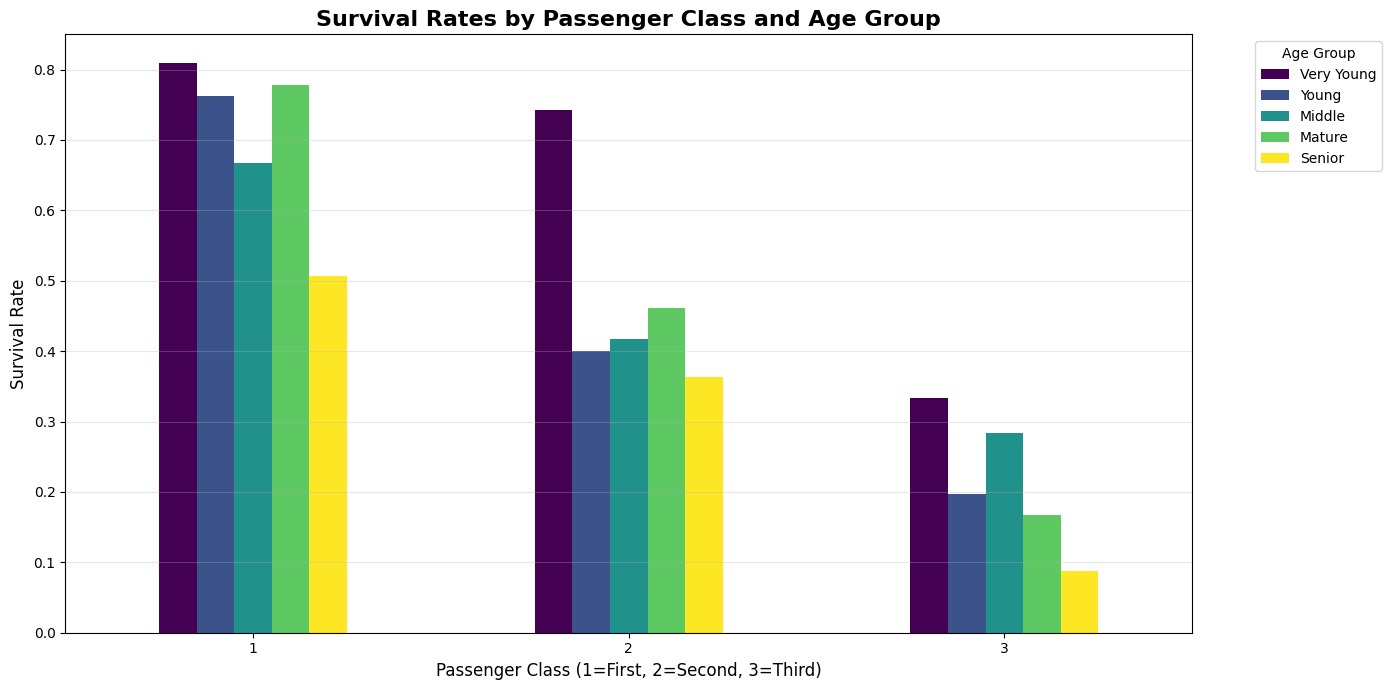


ALL TASKS COMPLETED!


In [ ]:
print("\n" + "=" * 80)
print("PROBLEM 6 (OPTIONAL): Survival by Age Group and Class")
print("=" * 80)

titanic_age = titanic_df.dropna(subset=['Age']).copy()

titanic_age['Age_Group'] = pd.qcut(titanic_age['Age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Mature', 'Senior'])

print("\nAge groups created:")
print(titanic_age['Age_Group'].value_counts().sort_index())

survival_age_class = titanic_age.groupby(['Pclass', 'Age_Group'])['Survived'].mean().unstack()
print("\nSurvival Rates by Passenger Class and Age Group:")
print(survival_age_class)

plt.figure(figsize=(12, 6))
sns.heatmap(survival_age_class, annot=True, fmt='.2%', cmap='RdYlGn', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rates by Passenger Class and Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Passenger Class', fontsize=12)
plt.tight_layout()
plt.show()

survival_age_class.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Survival Rates by Passenger Class and Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class (1=First, 2=Second, 3=Third)', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ALL TASKS COMPLETED!")
print("=" * 80)